In [138]:
#importing libraries
from sklearn.linear_model import LinearRegression 
import pandas as pd
import numpy as np

In [139]:
#importing the training dataset
train_df=pd.read_csv("D:/CodesOnBytes/Phase_2_task_2/traindataset.csv")

In [140]:
train_df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [141]:
#checking for missing values
train_df.isna().sum()

x    0
y    1
dtype: int64

In [142]:
#Fillinf the missing value with mean of the feature
train_df.y.fillna(train_df.y.mean(),inplace=True)

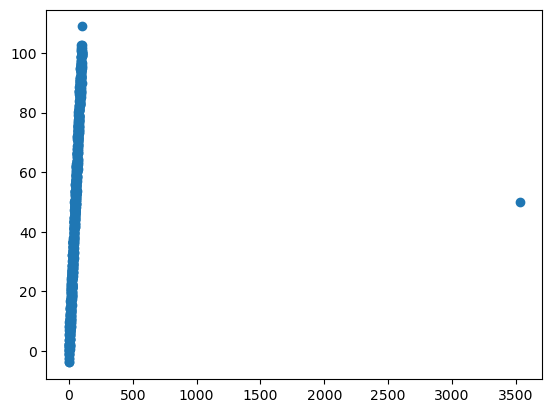

In [143]:
#Plotting data to find outliers 
import matplotlib.pyplot as plt
plt.scatter(train_df.x,train_df.y)

In [144]:
#Accessing the outlier's index
train_df.y.index[train_df['x']>=3500]

Int64Index([213], dtype='int64')

In [145]:
#Removing the outlier data
train_df.drop(213,inplace=True)

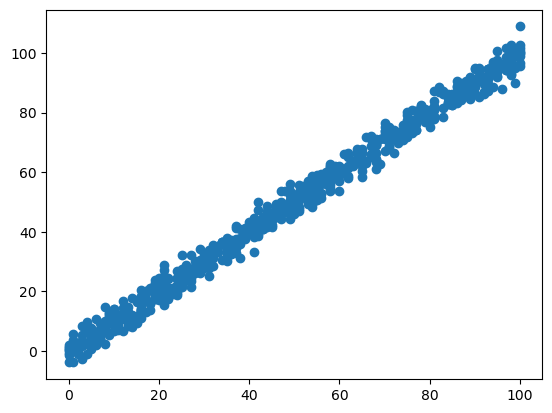

In [146]:
#plot without outlier
import matplotlib.pyplot as plt
plt.scatter(train_df.x,train_df.y)

In [147]:
#converting the dataset to array and reshaping
x=np.array(train_df.x)
y=np.array(train_df.y)
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [148]:
#spliting the data to 2 parts - training and validation 
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,train_size=0.9)

In [149]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [150]:
y_pred=lr.predict(x_val)

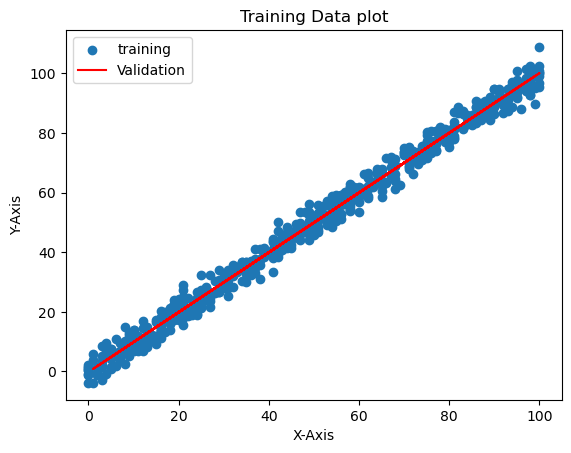

In [151]:
#Plotting training data and validation 
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,label='training')
plt.plot(x_val,lr.predict(x_val),color='r',label='Validation')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Training Data plot')
plt.legend()
plt.show()

In [152]:
#Extracting test data
test_df=pd.read_csv("D:/CodesOnBytes/Phase_2_task_2/testdataset.csv")

In [153]:
test_df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [154]:
#reshaping test data array
x_test=np.array(test_df.x)
y_test=np.array(test_df.y)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [155]:
#Accuracy of the algorithm
Y_predict=lr.predict(x_test)
lr.score(Y_predict,y_test)

0.9888442808779629

In [156]:
#root mean squared error of the algorithm
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,Y_predict,squared=False)

3.064561504051007

In [157]:
#Absolute error score of the algorithm
from sklearn.metrics import d2_absolute_error_score
d2_absolute_error_score(y_test,Y_predict)

0.9021107424027186

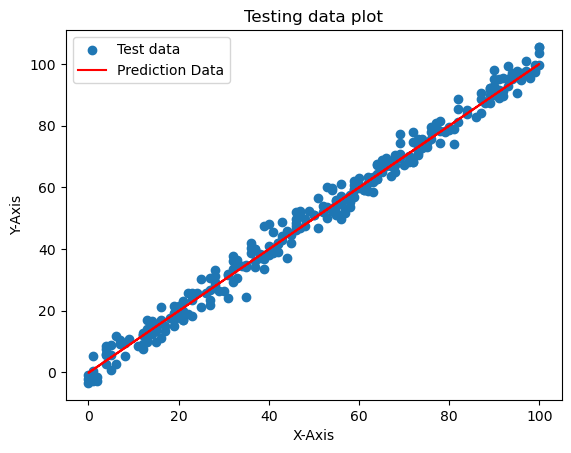

In [158]:
#plotting test data
import matplotlib.pyplot as plt1
plt1.scatter(x_test,y_test,label='Test data')
plt1.plot(x_test,Y_predict,color='red',label='Prediction Data')
plt1.xlabel('X-Axis')
plt1.ylabel('Y-Axis')
plt1.legend()
plt.title('Testing data plot')
plt.show()